<a href="https://colab.research.google.com/github/genarioazevedoufape/atividades_pet_data_science/blob/main/Projeto_RP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Spaceship Titanic
Equipe:

1.   Genário Correia
2.   João Victor Iane
3.   Matheus Henrique



### Carregamento dos Dados



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

### Carregamento dos dados

In [ ]:
full_train = pd.read_csv('https://raw.githubusercontent.com/genarioazevedoufape/estudos_data_science/refs/heads/main/Data/train.csv')
print('Rows:', full_train.shape[0], ' | Columns:', full_train.shape[1])
full_train.head()

full_test = pd.read_csv('https://raw.githubusercontent.com/genarioazevedoufape/estudos_data_science/refs/heads/main/Data/test.csv')
print('Rows:', full_test.shape[0], ' | Columns:', full_test.shape[1])
full_test.head()

Rows: 8693  | Columns: 14
Rows: 4277  | Columns: 13


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


### Variavel Target

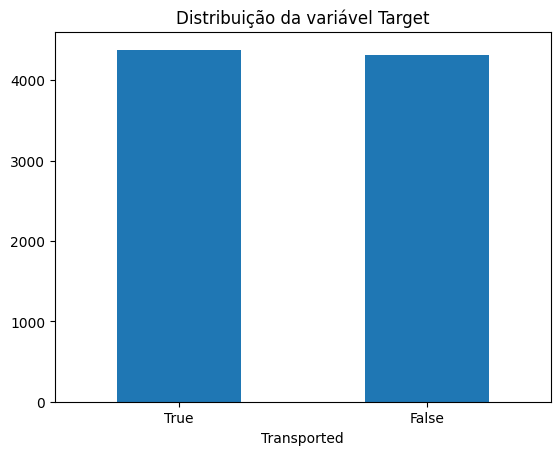

In [ ]:
full_train.Transported.value_counts().plot(kind="bar", title="Distribuição da variável Target", xlabel="Transported", rot=0)
plt.show()

In [ ]:
full_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [ ]:
full_train.isna().sum()/full_train.shape[0]

,0
PassengerId,0.000000
HomePlanet,0.023122
CryoSleep,0.024963
Cabin,0.022892
Destination,0.020936
Age,0.020591
VIP,0.023352
RoomService,0.020821
FoodCourt,0.021051
ShoppingMall,0.023927


Text(95.72222222222221, 0.5, 'Variables')

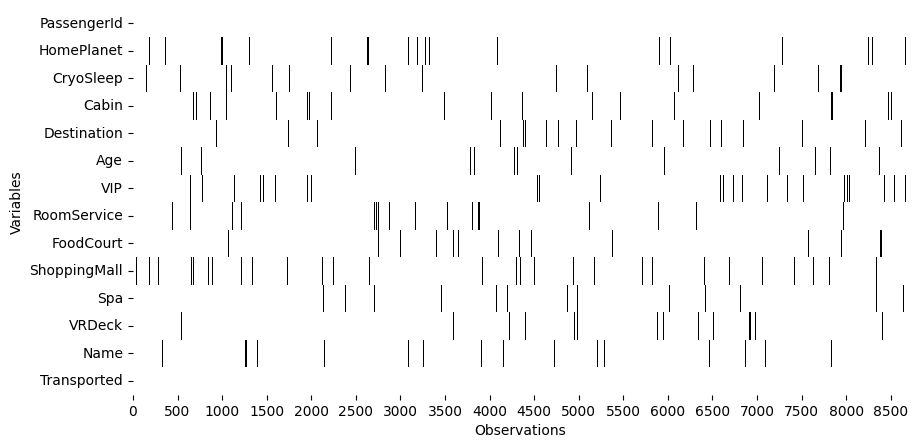

In [ ]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (10, 5))
sns.heatmap(full_train.isnull().T, cmap = 'binary', xticklabels = 500, ax = ax, cbar = False)
ax.set_xlabel(r'Observations')
ax.set_ylabel(r'Variables')

### Transformando os dados

In [ ]:
full_train['HomePlanet'].fillna('Unknown', inplace=True)
full_train=full_train.dropna(subset=['CryoSleep'])
full_train=full_train.dropna(subset=['Cabin'])
full_train['Destination'].fillna('Unknown', inplace=True)
full_train['Age'].fillna(full_train['Age'].mean(), inplace=True)
full_train['VIP'].fillna(False, inplace=True)
full_train['RoomService'].fillna(0, inplace=True)
full_train['FoodCourt'].fillna(0, inplace=True)
full_train['ShoppingMall'].fillna(0, inplace=True)
full_train['Spa'].fillna(0, inplace=True)
full_train['VRDeck'].fillna(0, inplace=True)
full_train=full_train.drop(columns=['Name'])


full_test['HomePlanet'].fillna('Unknown', inplace=True)


full_test['Destination'].fillna('Unknown', inplace=True)
full_test['Age'].fillna(full_test['Age'].mean(), inplace=True)
full_test['VIP'].fillna(False, inplace=True)
full_test['RoomService'].fillna(0, inplace=True)
full_test['FoodCourt'].fillna(0, inplace=True)
full_test['ShoppingMall'].fillna(0, inplace=True)
full_test['Spa'].fillna(0, inplace=True)
full_test['VRDeck'].fillna(0, inplace=True)
full_test=full_test.drop(columns=['Name'])

In [ ]:
print(full_train.isnull().sum())

print(f'Depois de lidar com nan : : {full_train.shape[0]}')

In [ ]:
# Converte a coluna da cabine em colunas (Deck, Num, Side)
full_train[['Deck', 'Num','Side']] = full_train.Cabin.str.split("/", expand = True)
full_test[['Deck', 'Num','Side']] = full_test.Cabin.str.split("/", expand = True)

# Remova a antiga coluna da cabine
full_train=full_train.drop(columns=['Cabin'])
full_test=full_test.drop(columns=['Cabin'])

### One hot encoding:

In [ ]:
# Convertendo a coluna 'Side' em um valor booleano: True se for 'P', False se for 'S'
full_train['Side_P'] = full_train['Side'] == 'P'

# Removendo a coluna antiga 'Side'
full_train = full_train.drop(columns=['Side'])

# Para o conjunto de teste
full_test['Side_P'] = np.where(full_test['Side'] == 'P', True, np.where(full_test['Side'] == 'S', False, np.nan))

# Removendo a coluna antiga 'Side'
full_test = full_test.drop(columns=['Side'])

# A coluna 'Deck' possui 8 categorias, aplicamos One-Hot Encoding
full_train = pd.get_dummies(full_train, columns=['Deck'])
full_test = pd.get_dummies(full_test, columns=['Deck'])

# A coluna 'Num' convertida para inteiro
full_train = full_train.astype({'Num': 'int'})

# Para o conjunto de teste
full_test['Num'] = pd.to_numeric(full_test['Num'], errors='coerce').astype('Int64')

# Aplicando One-Hot Encoding para as colunas 'HomePlanet' e 'Destination'
full_train = pd.get_dummies(full_train, columns=['HomePlanet', 'Destination'])
full_test = pd.get_dummies(full_test, columns=['HomePlanet', 'Destination'])

# Convertendo a coluna 'CryoSleep' para booleano
full_train = full_train.astype({'CryoSleep': 'bool'})

# Para o conjunto de teste
full_test['CryoSleep'] = full_test['CryoSleep'].astype(pd.BooleanDtype())

# Verificando os tipos de dados do conjunto de treinamento
full_train.info()


### Lidando com dados ausentes nos dados de teste

In [ ]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=10)

test_imputed = imputer.fit_transform(full_test)
test_imputed = pd.DataFrame(test_imputed)

full_test['CryoSleep'] = test_imputed[1]
full_test['Num'] = test_imputed[9]
full_test['Side_P'] = test_imputed[10]

### Alterando bool para int

In [ ]:
columns_to_convert_to_int = ['CryoSleep', 'VIP', 'Transported', 'Side_P',
                             'Deck_A', 'Deck_B', 'Deck_C', 'Deck_D', 'Deck_E',
                             'Deck_F', 'Deck_G', 'Deck_T', 'HomePlanet_Earth',
                             'HomePlanet_Europa', 'HomePlanet_Mars', 'HomePlanet_Unknown',
                             'Destination_55 Cancri e', 'Destination_PSO J318.5-22',
                             'Destination_TRAPPIST-1e', 'Destination_Unknown']
train = full_train.astype({col: 'int' for col in columns_to_convert_to_int})

columns_to_convert_to_int = ['VIP',
                             'Deck_A', 'Deck_B', 'Deck_C', 'Deck_D', 'Deck_E',
                             'Deck_F', 'Deck_G', 'Deck_T', 'HomePlanet_Earth',
                             'HomePlanet_Europa', 'HomePlanet_Mars', 'HomePlanet_Unknown',
                             'Destination_55 Cancri e', 'Destination_PSO J318.5-22',
                             'Destination_TRAPPIST-1e', 'Destination_Unknown']

test = full_test.astype({col: 'int' for col in columns_to_convert_to_int})

In [ ]:
X = train.drop(['Transported', 'PassengerId'], axis=1)
y = train['Transported']

In [ ]:
X_test = test.drop(['PassengerId'], axis=1)

### Houldout

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=30)

### Modelo KNN

In [ ]:
model8 = KNeighborsClassifier(n_neighbors=170)

model8.fit(X_train, y_train)

y_pred = model8.predict(X_val)

accuracy = accuracy_score(y_val, y_pred)
print(f"Acurácia: {accuracy}")

print("Relatório de Classificação:")
print(classification_report(y_val, y_pred))

print("Matriz de Confusão:")
print(confusion_matrix(y_val, y_pred))